In [1]:
# packages
import sympy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import optimization
import strawberryfields as sf
import warnings
import auxiliary

# ignore certain errors 
warnings.filterwarnings("ignore", category=SyntaxWarning)

/Users/etiennestock/Documents/packages/strawberryfields/strawberryfields/apps/data/sample.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Operators

In [2]:
# initial quadratures, non cummuting
q0, p0 = sympy.symbols('q_0 p_0', commutative=False)

qm10, pm10 = sympy.symbols('q^{(1)}_0 p^{(1)}_0', commutative=False)
qm20, pm20 = sympy.symbols('q^{(2)}_0 p^{(2)}_0', commutative=False)

# circuit parameters
r, theta, c, s = sympy.symbols('r_0 theta_0 c_0 s_0')

# hyperparameter
k = sympy.symbols('k')

# q component of the gates: squeezing, rotation, position displacement and cubic phase gate
Sq = q0 * sympy.exp(r)
Rq = q0 * sympy.cos(theta) + p0 * sympy.sin(theta)
Xq = q0 + c
Zq = q0
Vq = q0
Vkq = q0
BSm1q = (qm10 - qm20)/sympy.sqrt(2)
BSm2q = (qm10 + qm20)/sympy.sqrt(2)

# p component of the gates: squeezing, roatation, position displacement and cubic phase gate
Sp = p0 * sympy.exp(-r)
Rp = -q0 * sympy.sin(theta) + p0 * sympy.cos(theta)
Xp = p0
Zp = p0 + c
Vp = q0**2 * (-3*s) + p0*s
Vkp = q0**(k-1) * (-k*s) + p0*s
BSm1p = (pm10 - pm20)/sympy.sqrt(2)
BSm2p = (pm10 + pm20)/sympy.sqrt(2)

## Displacement 

$
\hat{X} = \exp \left( - ic \hat{p} \right) :\begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix} \mapsto 
\begin{pmatrix}
    \hat{q} + c\\
    \hat{p}
\end{pmatrix}
$

$
\hat{Z} = \exp \left( - ic \hat{q} \right) : \begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix} \mapsto 
\begin{pmatrix}
    \hat{q} \\
    \hat{p} + c
\end{pmatrix}
$

In [3]:
Xq

c_0 + q_0

In [4]:
Xp

p_0

In [5]:
Zq

q_0

In [6]:
Zp

c_0 + p_0

### Squeezing gate
$
\hat{S}(r) = \exp\left( i \frac{r}{2} \left(\hat{q} \hat{p} + \hat{p} \hat{q} \right)\right): 
\begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix} \mapsto 
\begin{pmatrix}
    \exp(r) \hat{q} \\
    \exp(-r) \hat{p}
\end{pmatrix}
$

In [7]:
Sq

exp(r_0)*q_0

In [8]:
Sp

exp(-r_0)*p_0

### Rotation gate

$
R(\theta) = \exp\left( i \frac{\theta}{2} \left( \hat{q}^2 + \hat{p}^2 \right) \right): 
\begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix} \mapsto 
\begin{pmatrix}
    \cos(\theta) & \sin(\theta) \\
    -\sin(\theta) & \cos(\theta)
\end{pmatrix}
\begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix}
$ 

In [9]:
Rq

sin(theta_0)*p_0 + cos(theta_0)*q_0

In [10]:
Rp

-sin(theta_0)*q_0 + cos(theta_0)*p_0

### Cubic phase gate

$
V(s) = \exp\left( -is\hat{q}^3 \right): 
\begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix} \mapsto 
\begin{pmatrix}
    \hat{q} \\
    s \hat{p} - 3s q^2
\end{pmatrix}
$

In [11]:
Vq

q_0

In [12]:
Vp

s_0*p_0 - 3*s_0*q_0**2

### Phase gate 

$
V_k(s) = \exp\left( -i s\hat{q}^k \right): 
\begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix} \mapsto 
\begin{pmatrix}
    \hat{q} \\
    s \hat{p} - k s q^{k-1}
\end{pmatrix}
$

In [13]:
Vkq

q_0

In [14]:
Vkp

-k*s_0*q_0**(k - 1) + s_0*p_0

### Kerr gate

$
K(\kappa) = \exp\left(i\kappa \hat{n}^2\right): 
\begin{pmatrix}
    \hat{q} \\
    \hat{p}
\end{pmatrix} \mapsto 
\text{polynomial of high order}
$

### Beam splitter

$
BS:
\begin{pmatrix}
    \hat{q}_1 \\
    \hat{p}_1 \\
    \hat{q}_2 \\
    \hat{p}_2
\end{pmatrix} \mapsto 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
    \hat{q}_1 - \hat{q}_2 \\
    \hat{p}_1 - \hat{p}_2 \\
    \hat{q}_1 + \hat{q}_2 \\
    \hat{p}_1 + \hat{p}_2
\end{pmatrix}
$

In [15]:
BSm1q

sqrt(2)*(q^{(1)}_0 - q^{(2)}_0)/2

In [16]:
BSm1p

sqrt(2)*(p^{(1)}_0 - p^{(2)}_0)/2

In [17]:
BSm2q

sqrt(2)*(q^{(1)}_0 + q^{(2)}_0)/2

In [18]:
BSm2p

sqrt(2)*(p^{(1)}_0 + p^{(2)}_0)/2

The package 'sympy' can be used to calculate the polynomial after the circuit preparation computationally and alegrbaically. Furthermore, it provides a way to insert the optimal parameters once they have been found. 

$$
\begin{equation}
    \begin{pmatrix}
        \hat{q}_0 \\
        \hat{p}_0
    \end{pmatrix} \mapsto 
    \begin{pmatrix}
        \hat{q}_1 \\
        \hat{p}_1
    \end{pmatrix} = 
    \prod_{i=1}^{n_{\text{blocks}}}  S(r_i) C(s_i) R(\theta_i) X(c_i) 
    \begin{pmatrix}
        \hat{q} \\
        \hat{p} 
    \end{pmatrix}
    X(c_i)^\dagger R(\theta_i)^\dagger C(s_i)^\dagger S(r_i)^\dagger 
\end{equation}
$$

### One round cricuit

In [21]:
# q and p component for one round of application of the optimisation circuit
q1 = Xq.subs({q0: Rq, p0: Rp}, simultaneous=True).subs({q0: Vq, p0: Vp}, simultaneous=True).subs({q0: Sq, p0: Sp}, simultaneous=True)
p1 = Xp.subs({p0: Rp}, simultaneous=True).subs({q0: Vq, p0: Vp}, simultaneous=True).subs({q0: Sq, p0: Sp}, simultaneous=True)

In [22]:
q1

c_0 + exp(r_0)*cos(theta_0)*q_0 + sin(theta_0)*(-3*s_0*exp(2*r_0)*q_0**2 + s_0*exp(-r_0)*p_0)

In [23]:
p1

-exp(r_0)*sin(theta_0)*q_0 + cos(theta_0)*(-3*s_0*exp(2*r_0)*q_0**2 + s_0*exp(-r_0)*p_0)

### Arbirtrary rounds

In [24]:
num_blocks = 2

r, theta, c, s = sympy.symbols('r_0 theta_0 c_0 s_0')

Sq = q0 * sympy.exp(r)
Rq = q0 * sympy.cos(theta) + p0 * sympy.sin(theta)
Xq = q0 + c
Cq = q0

Sp = p0 * sympy.exp(-r)
Rp = -q0 * sympy.sin(theta) + p0 * sympy.cos(theta)
Xp = p0
Cp = q0**2 * (-3*s) + p0*s

q1 = Xq.subs({q0: Rq, p0: Rp}, simultaneous=True).subs({q0: Cq, p0: Cp}, simultaneous=True).subs({q0: Sq, p0: Sp}, simultaneous=True)
p1 = Xp.subs({p0: Rp}, simultaneous=True).subs({q0: Cq, p0: Cp}, simultaneous=True).subs({q0: Sq, p0: Sp}, simultaneous=True)

for i in range(num_blocks-1): 
    var_string = f'r_{i+1} theta_{i+1} c_{i+1} s_{i+1}'

    r, theta, c, s = sympy.symbols(var_string)

    Sq = q0 * sympy.exp(r)
    Rq = q0 * sympy.cos(theta) + p0 * sympy.sin(theta)
    Xq = q0 + c
    Cq = q0
    
    Sp = p0 * sympy.exp(-r)
    Rp = -q0 * sympy.sin(theta) + p0 * sympy.cos(theta)
    Xp = p0
    Cp = q0**2 * (-3*s) + p0*s
    
    qc = Xq.subs({q0: Rq, p0: Rp}, simultaneous=True).subs({q0: Cq, p0: Cp}, simultaneous=True).subs({q0: Sq, p0: Sp}, simultaneous=True)
    pc = Xp.subs({p0: Rp}, simultaneous=True).subs({q0: Cq, p0: Cp}, simultaneous=True).subs({q0: Sq, p0: Sp}, simultaneous=True)

    q1 = q1.subs({q0: qc, p0: pc}, simultaneous=True)
    p1 = p1.subs({q0: qc, p0: pc}, simultaneous=True) 

In [25]:
q1

c_0 + exp(r_0)*cos(theta_0)*(c_1 + exp(r_1)*cos(theta_1)*q_0 + sin(theta_1)*(-3*s_1*exp(2*r_1)*q_0**2 + s_1*exp(-r_1)*p_0)) + sin(theta_0)*(-3*s_0*exp(2*r_0)*(c_1 + exp(r_1)*cos(theta_1)*q_0 + sin(theta_1)*(-3*s_1*exp(2*r_1)*q_0**2 + s_1*exp(-r_1)*p_0))**2 + s_0*exp(-r_0)*(-exp(r_1)*sin(theta_1)*q_0 + cos(theta_1)*(-3*s_1*exp(2*r_1)*q_0**2 + s_1*exp(-r_1)*p_0)))

In [26]:
p1

-exp(r_0)*sin(theta_0)*(c_1 + exp(r_1)*cos(theta_1)*q_0 + sin(theta_1)*(-3*s_1*exp(2*r_1)*q_0**2 + s_1*exp(-r_1)*p_0)) + cos(theta_0)*(-3*s_0*exp(2*r_0)*(c_1 + exp(r_1)*cos(theta_1)*q_0 + sin(theta_1)*(-3*s_1*exp(2*r_1)*q_0**2 + s_1*exp(-r_1)*p_0))**2 + s_0*exp(-r_0)*(-exp(r_1)*sin(theta_1)*q_0 + cos(theta_1)*(-3*s_1*exp(2*r_1)*q_0**2 + s_1*exp(-r_1)*p_0)))

# Simulations

We can turn the optimization problem around: instead of starting from the vacuum and trying to unitarily drive it to the target state, we can start from the target state and try to find the unitary transformation $U(\vec{\lambda})$ that maximizes

$$\left|\left<0\right| U(\vec{\lambda})\left|\Psi_t \right>\right|^2.$$ 

 
Our generated state, 

$$ \left|\Psi_g \right> = U(\vec{\lambda})^\dagger\left|0 \right> ,$$ 

is a good approximation of the target state when the fidelity,

$$ F = \left|\left<\Psi_g |\Psi_t \right>\right|^2 ,$$

is maximized.

In [27]:
# general stuff
## gates
def Scgate(phi): return sf.ops.Sgate(1, phi)
def Dcgate(phi): return sf.ops.Dgate(1, phi)
def Vtanhgate(s): return sf.ops.Vgate(np.tanh(s))
def V4tanhgate(s): return sf.ops.Vkgate(np.tanh(s), 4)
def V5gate(s): return sf.ops.Vkgate(s, 5)
def V5tanhgate(s): return sf.ops.Vkgate(np.tanh(s), 5)
def V6tanhgate(s): return sf.ops.Vkgate(np.tanh(s), 6)
def V7tanhgate(s): return sf.ops.Vkgate(np.tanh(s), 7)
def V8tanhgate(s): return sf.ops.Vkgate(np.tanh(s), 8)
def V9tanhgate(s): return sf.ops.Vkgate(np.tanh(s), 9)
def V11tanhgate(s): return sf.ops.Vkgate(np.tanh(s), 11)
def Kdl2c2gate(kappa): return sf.ops.Kdlcgate(kappa, 2, 2)
def Kdl6c2gate(kappa): return sf.ops.Kdlcgate(kappa, 6, 2)
def Kdl10c2gate(kappa): return sf.ops.Kdlcgate(kappa, 10, 2)

## Explanations to the optimisation

There is a certain gate set which is applied num_blocks times, i.e. the circuit 'XRKS' applied three times means that the circuit is 'XRKSXRKSXRKS'. The cutoff refers to the number of Fock basis states which are considered during the numerics. delta is a parameter determining the gaussian envolope of the realistic GKP-state. 

## Gold Standard: Kerr-circuit

We start with the following circuit:

XRKS
1. X: Displacement operator
2. R: Rotation gate
3. K: Kerr gate
4. S: Squeezing gate

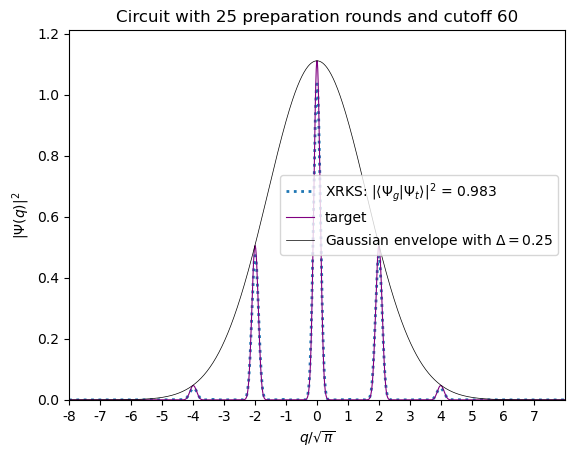

In [28]:
# hyperparameter
cutoff = 60
delta = 0.25
epsilon = delta**2
num_blocks = 25
state = [0,0]
circuit = 'XRKS'

# read in data
file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuit}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks}"
opt = optimization.Optimization(file_name=file_name)
bestFid = opt.get_bestFid()

# plot state 
qnum = 8
qlim = qnum*np.sqrt(np.pi)
qvalues = np.linspace(-qlim,qlim, 1000)

ket_GKP = auxiliary.prepare_GKP(epsilon=epsilon, cutoff=cutoff, state=state).ket()
wf_GKP = auxiliary.wavefunction(q=qvalues, ket=ket_GKP)
gauss = lambda x: np.max(np.abs(wf_GKP*wf_GKP.conj())) * np.exp(-x**2*(delta)**2)

ket_rec = opt.prepare_best_state().ket()
wf_rec = auxiliary.wavefunction(q=qvalues, ket=ket_rec)

plt.plot(qvalues, np.abs(wf_rec*wf_rec.conj()), label=f'{circuit}: '+r'$|\langle\Psi_g|\Psi_t\rangle|^2$'+f' = {bestFid:.3f}', linestyle='dotted', linewidth=2)
plt.plot(qvalues, np.abs(wf_GKP*wf_GKP.conj()), label='target', color='purple', linewidth=0.8)
plt.plot(qvalues, gauss(qvalues), label=r'Gaussian envelope with $\Delta =$'+f'{delta}', color='black', linewidth=0.5)

plt.title(f'Circuit with {np.max(num_blocks)} preparation rounds and cutoff {cutoff}')
plt.xticks(np.sqrt(np.pi)*np.arange(-qnum, qnum), np.arange(-qnum, qnum))
plt.xlabel("$q/\sqrt{\pi}$")
plt.xlim(np.min(qvalues), np.max(qvalues))
plt.ylabel("$|\Psi(q)|^2$")
plt.ylim(0, np.max(np.abs(wf_GKP*wf_GKP.conj()))+0.1)
plt.legend()

plt.show()

### Conclusion 

For (arbitrary) high cutoff, the circuit including the Kerr gate as non-gaussian gate provides sufficiently good fidelity results. Unfortunately, the Kerr gate does not come with a convenient commutation relation with the quadrature components. Thus, the quadratures can't be expressed in a nice closed form of the initial quadratures after the circuit preparation. However, the cubic phase gate allows for such a commutation relation: 

$$
e^{is\hat{q}^3}\hat{p}e^{-is\hat{q}^3} = p-3s\hat{q}^2
$$

This relation hols more generally for $k \in \mathbb{N}$: 

$$
e^{is\hat{q}^k}\hat{p}e^{-is\hat{q}^k} = p-ks\hat{q}^{k-1}
$$

Exploting this closed commutation realtion, we want to establish a circuit including these non-gaussian gates to finally obtain a polynomial describtion of quadratures in terms of the initial quadratures $(q_0, p_0)$. This, then, allows the determination of the error propagation of an initial gaussian error through the circuits.


## Complete random parameters

On the one hand, we already saw the gold standard of optimal high fidelity using the circuuit including the Kerr gate as non-gaussian state. Let's observe what happens when we consider the cubic phase gate circuit with completely arbitrary parameters.

XRVS
1. X: Displacement operator
2. R: Rotation gate
3. V: Cubic phase gate
4. S: Squeezing gate

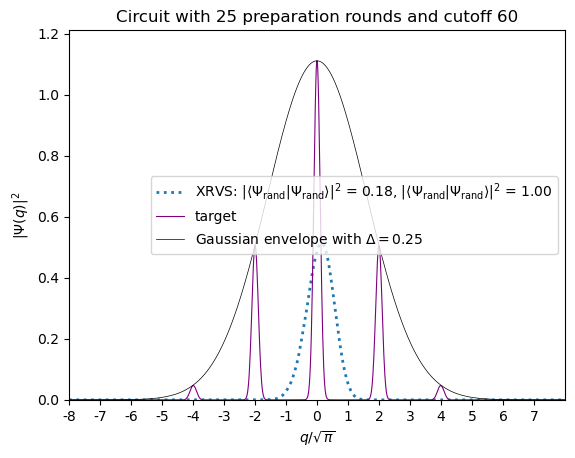

In [29]:
# hyperparameter
delta = 0.25
epsilon = delta**2
cutoff = 60
state = [0,0]
num_blocks = 25
circuit = 'XRVS'
params = 0.1*np.random.rand(num_blocks*4)

# generate target state and random state
ket_GKP = auxiliary.prepare_GKP(epsilon=epsilon, cutoff=cutoff, state=state).ket()
ket_rand = auxiliary.prepare_state(auxiliary.string_to_gateset(circuit), params, cutoff).ket()

# calculate norm and fidelity
norm = np.abs(np.dot(ket_rand.conj(), ket_rand))
fid = np.abs(np.dot(ket_rand.conj(), ket_GKP))**2

# plot state 
qnum = 8
qlim = qnum*np.sqrt(np.pi)
qvalues = np.linspace(-qlim,qlim, 1000)

wf_GKP = auxiliary.wavefunction(q=qvalues, ket=ket_GKP)
wf_rand = auxiliary.wavefunction(q=qvalues, ket=ket_rand)

gauss = lambda x: np.max(np.abs(wf_GKP*wf_GKP.conj())) * np.exp(-x**2*(delta)**2)

plt.plot(qvalues, np.abs(wf_rand*wf_rand.conj()), label=f'{circuit}: '+r'$|\langle\Psi_{\text{rand}}|\Psi_{\text{rand}}\rangle|^2$'+f' = {fid:.2f}, ' + r'$|\langle\Psi_{\text{rand}}|\Psi_{\text{rand}}\rangle|^2$'+f' = {norm:.2f}', linestyle='dotted', linewidth=2)
plt.plot(qvalues, np.abs(wf_GKP*wf_GKP.conj()), label='target', color='purple', linewidth=0.8)
plt.plot(qvalues, gauss(qvalues), label=r'Gaussian envelope with $\Delta =$'+f'{delta}', color='black', linewidth=0.5)

plt.title(f'Circuit with {np.max(num_blocks)} preparation rounds and cutoff {cutoff}')
plt.xticks(np.sqrt(np.pi)*np.arange(-qnum, qnum), np.arange(-qnum, qnum))
plt.xlabel("$q/\sqrt{\pi}$")
plt.xlim(np.min(qvalues), np.max(qvalues))
plt.ylabel("$|\Psi(q)|^2$")
plt.ylim(0, np.max(np.abs(wf_GKP*wf_GKP.conj()))+0.1)
plt.legend()

plt.show()

# Problem: Cubic phase gate circuit converges not optimally

XRVS
1. X: Displacement operator
2. R: Rotation gate
3. V: Cubic phase gate
4. S: Squeezing gate

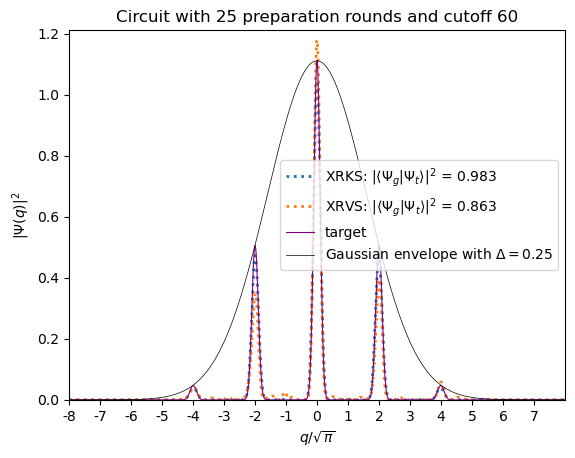

In [38]:
# hyperparameter
cutoff = 60
delta = 0.25
num_blocks = [25, 25]
state = [0,0]
circuits = ['XRKS', 'XRVS'] 

# read in data
opt = []
bestFids = []
bestNorm = []

for i in range(len(circuits)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt.append(optimization.Optimization(file_name=file_name))
    bestFids.append(opt[i].get_bestFid())
    bestNorm.append(opt[i].norm_best_state())

# plot state 
qnum = 8
qlim = qnum*np.sqrt(np.pi)
qvalues = np.linspace(-qlim,qlim, 1000)

ket_GKP = auxiliary.prepare_GKP(epsilon=epsilon, cutoff=cutoff, state=state).ket()
wf_GKP = auxiliary.wavefunction(q=qvalues, ket=ket_GKP)
gauss = lambda x: np.max(np.abs(wf_GKP*wf_GKP.conj())) * np.exp(-x**2*(delta)**2)

length = []

for i in range(len(circuits)):
    ket_rec = opt[i].prepare_best_state().ket()
    wf_rec = auxiliary.wavefunction(q=qvalues, ket=ket_rec)
    plt.plot(qvalues, np.abs(wf_rec*wf_rec.conj()), label=f'{circuits[i]}: '+r'$|\langle\Psi_g|\Psi_t\rangle|^2$'+f' = {bestFids[i]:.3f}', linestyle='dotted', linewidth=2)
    length.append((auxiliary.count_gates(circuits[i]))*num_blocks[i])
    
plt.plot(qvalues, np.abs(wf_GKP*wf_GKP.conj()), label='target', color='purple', linewidth=0.8)
plt.plot(qvalues, gauss(qvalues), label=r'Gaussian envelope with $\Delta =$'+f'{delta}', color='black', linewidth=0.5)

plt.title(f'Circuit with {np.max(num_blocks)} preparation rounds and cutoff {cutoff}')
plt.xticks(np.sqrt(np.pi)*np.arange(-qnum, qnum), np.arange(-qnum, qnum))
plt.xlabel("$q/\sqrt{\pi}$")
plt.xlim(np.min(qvalues), np.max(qvalues))
plt.ylabel("$|\Psi(q)|^2$")
plt.ylim(0, np.max(np.abs(wf_GKP*wf_GKP.conj()))+0.1)
plt.legend()

plt.show()

In [40]:
# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = length
results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$
0,XRKS,0.991622,0.983015,100
1,XRVS,0.935438,0.862651,100


### Conclusion

The circuit including the cubic phase gate as non-gaussian gate performs in terms of fidelity and normalization significantly worse than Kerr-gate. In the following, there are different ansätze how to increase the fidelity and how to obtain the optimal parameters: 

# Ansätze

##  Regularised cubic phase gate

Ansatz: Speed up learning by using the regularised cubic phase gate.

XRVtanhS
1. X: Displacement operator
2. R: Rotation gate
3. Vtanh: regularised Cubic phase gate: $V_{\tanh}(s) = \exp\left( -i\tanh(s)\hat{q}^3 \right)$
4. S: Squeezing gate

In [45]:
# hyperparameter
cutoff = 60
delta = 0.25
num_blocks = [25, 25, 25]
state = [0,0]
circuits = ['XRKS', 'XRVS', 'XRVtanhS'] 

# read in data
opt = []
bestFids = []
bestNorm = []
length = []

for i in range(len(circuits)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt.append(optimization.Optimization(file_name=file_name))
    bestFids.append(opt[i].get_bestFid())
    bestNorm.append(opt[i].norm_best_state())
    length.append((auxiliary.count_gates(circuits[i]))*num_blocks[i])

# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = length
results[r'$n_{\text{cutoff}}$'] = [cutoff for i in range(len(circuits))]

results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,$n_{\text{cutoff}}$
0,XRKS,0.991622,0.983015,100,60
1,XRVS,0.935438,0.862651,100,60
2,XRVtanhS,0.975444,0.907736,100,60


### Conclusion

- regularised cubic phase gate produces less volatile results
- regularised cubic phase does not increase the norm
- regularised cubic phase gate still performs significantly worse than Kerr gate circuit

## 5-phase gate and regularised 5-phase gate

Ansatz: Use $k=5$ in $\exp(-is\hat{q}^k)$. 

XRV5S
1. X: Displacement operator
2. R: Rotation gate
3. V5: $V_{5}(s) = \exp\left( -is\hat{q}^5 \right)$
4. S: Squeezing gate

XRV5tanhS
1. X: Displacement operator
2. R: Rotation gate
3. V5tanh: $V_{5, \tanh}(s) = \exp\left( -i\tanh(s)\hat{q}^5 \right)$
4. S: Squeezing gate

In [46]:
# hyperparameter
cutoff = 60
delta = 0.25
num_blocks = [25, 25, 25, 25, 25]
state = [0,0]
circuits = ['XRKS', 'XRVS', 'XRVtanhS', 'XRV5S', 'XRV5tanhS'] 

# read in data
opt = []
bestFids = []
bestNorm = []
length = []

for i in range(len(circuits)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt.append(optimization.Optimization(file_name=file_name))
    bestFids.append(opt[i].get_bestFid())
    bestNorm.append(opt[i].norm_best_state())
    length.append((auxiliary.count_gates(circuits[i]))*num_blocks[i])

# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = length
results[r'$n_{\text{cutoff}}$'] = [cutoff for i in range(len(circuits))]

results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,$n_{\text{cutoff}}$
0,XRKS,0.991622,0.983015,100,60
1,XRVS,0.935438,0.862651,100,60
2,XRVtanhS,0.975444,0.907736,100,60
3,XRV5S,0.944505,0.861146,100,60
4,XRV5tanhS,0.939808,0.864852,100,60


### Conclusion

- $k=5$ performs comparably but does not outperform regularized cubic phase gate

# Failed Ansätze

## Higher order Phase Gates

Ansatz: Test for higher order $k$, even as well as odd.

XRVktanhS for $k \in \{4, 5, 6, 7, 8, 9, 11\}$
1. X: Displacement operator
2. R: Rotation gate
3. Vktanh: $V_{k, \tanh}(s) = \exp\left( -i\tanh(s)\hat{q}^k \right)$
4. S: Squeezing gate

In [47]:
# hyperparameter
cutoff = 60
delta = 0.25
num_blocks = [15, 15, 15, 15, 15, 15, 15, 15, 15]
state = [0,0]
circuits = ['XRKS', 'XRVtanhS', 'XRV4tanhS', 'XRV5tanhS', 'XRV6tanhS', 'XRV7tanhS', 'XRV8tanhS', 'XRV9tanhS', 'XRV11tanhS'] 

# read in data
opt = []
bestFids = []
bestNorm = []
length = []

for i in range(len(circuits)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt.append(optimization.Optimization(file_name=file_name))
    bestFids.append(opt[i].get_bestFid())
    bestNorm.append(opt[i].norm_best_state())
    length.append((auxiliary.count_gates(circuits[i]))*num_blocks[i])

# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = length
results[r'$n_{\text{cutoff}}$'] = [cutoff for i in range(len(circuits))]

results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,$n_{\text{cutoff}}$
0,XRKS,0.997908,0.991409,60,60
1,XRVtanhS,0.952388,0.726784,60,60
2,XRV4tanhS,0.931048,0.841683,60,60
3,XRV5tanhS,0.975633,0.892044,60,60
4,XRV6tanhS,0.970132,0.813645,60,60
5,XRV7tanhS,0.951221,0.807851,60,60
6,XRV8tanhS,0.995476,0.228247,60,60
7,XRV9tanhS,0.989551,0.148857,60,60
8,XRV11tanhS,0.981004,0.197767,60,60


### Conclusion

- fidelities for $k \geq 8$ are almost as bad as circuits with completely random parameters
- $k=7$ performs worse than $k = 5$
- $k=3$ and $k=5$ perform the best among all other $k$s, but still worse than the circuit including the Kerr gate as non-gaussian gate

## Sampling random circuits 

Ansatz: 
- sample randomly gates from the set $\{X, R, S, V, V_k, V_{k, \text{tanh}}\}$
- sample hugh completely random circuits which are then only performed once
- sample big randcom circuits which are then performed a small number of rounds

In [48]:
# hyperparameter
cutoff = 30
delta = 0.25
num_blocks = [10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
state = [0,0]
circuits = [
    'XRKS',
    'XRVtanhS',
    'RVtanhRXSRXVtanhRVtanhXRXRVtanhRVtanhXSXSVtanhRSXVtanhXVtanhXVtanhXSVtanhXVtanhSVtanhXVtanhR',
    'RVtanhRXVtanhXVtanhSVtanhRVtanhRVtanhXRXVtanhRVtanhXVtanhXVtanhXSRXSVtanhXVtanhXRVtanhRVtanhXRSVtanh',
    'RVtanhXRXSRXRSRSRSXSXVtanhXSVtanhSXVtanhRXVtanhXRXRXVtanhSXVtanhSXRS',
    'RXVtanhSVtanhRXVtanhRXVtanhSVtanhRXVtanhRXVtanhSVtanhRXVtanhRXVtanhSVtanhRX', 
    'SRSRVtanhXSVtanhXSXVtanhRVtanhRXSVtanhSRSVtanhSVtanhXSRVtanhRVtanhXRXVtanhRSRVtanhSR',
    'SVtanhXRXVtanhRSVtanhXVtanhXVtanhRSRXRVtanhRXRVtanhRXVtanhRSXRVtanhSVtanhRVtanhRVtanhRVtanhR', 
    'VtanhRSVtanhXSVtanhSRVtanhXSRVtanhXVtanhXSXRVtanhSVtanhSXVtanhSVtanhSVtanhRXVtanhXVtanhSRSXVtanh',
    'VtanhRVtanhRVtanhRVtanhXRVtanhXVtanhXRVtanhSXSRVtanhRVtanhXVtanhSVtanhXRSVtanhSRXVtanhRVtanhXVtanhRVtanh',
    'VtanhRVtanhSXVtanhSVtanhSVtanhSVtanhSXVtanhSRXVtanhSRXSRSXVtanhXRXSVtanhRSVtanhSRXSX',
    'VtanhRXVtanhRXVtanhXVtanhRXRVtanhSVtanhRVtanhXVtanhXSRSVtanhXRXVtanhSXVtanhSVtanhXVtanhXSVtanhXVtanh',
    'VtanhRXVtanhXVtanhRSXSXVtanhXVtanhXVtanhXRVtanhXVtanhRSRVtanhSVtanhXVtanhXVtanhXRSXRSXVtanhX',
    'VtanhXVtanhSRVtanhRVtanhXVtanhRVtanhSXSRXSVtanhSRSVtanhXVtanhRXSVtanhRXSVtanhXVtanhRXSVtanhS', 
    'VtanhXVtanhSRVtanhRVtanhXVtanhRVtanhSXSRXSVtanhSRSVtanhXVtanhRXSVtanhRXSVtanhXVtanhRXSVtanhS', 
    'XSRVtanhXVtanhXRXRSRVtanhXSVtanhSRXVtanhSVtanhXVtanhRXSXSRXVtanhSXVtanhSVtanhRSX', 
    'XVtanhRSVtanhRVtanhRVtanhRVtanhXVtanhXRXVtanhRXVtanhRVtanhRXVtanhSVtanhSRVtanhSVtanhSRVtanhRXRXR'
] 

# read in data
opt = []
lenght = []
ratio = []
bestFids = []
bestNorm = []

for i in range(len(circuits)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt.append(optimization.Optimization(file_name=file_name))
    bestFids.append(opt[i].get_bestFid())
    bestNorm.append(opt[i].norm_best_state())
    lenght.append(auxiliary.count_gates(circuits[i])*num_blocks[i])
    ratio.append(auxiliary.gate_ratio(circuits[i]))

# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = lenght 
results[r'$n_{\text{cutoff}}$'] = [cutoff for i in range(len(circuits))]
results['S'] = [ratio[i]['S'] for i in range(len(circuits))]
results['R'] = [ratio[i]['R'] for i in range(len(circuits))]
results['X'] = [ratio[i]['X'] for i in range(len(circuits))]
results['Vtanh'] = [0]+[ratio[i]['Vtanh'] for i in range(1,len(circuits))]

# round results
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'].round(3)
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'].round(3)
results['S'] = results['S'].round(2)
results['R'] = results['R'].round(2)
results['X'] = results['X'].round(2)
results['Vtanh'] = results['Vtanh'].round(2)

# show results
results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,$n_{\text{cutoff}}$,S,R,X,Vtanh
0,XRKS,0.994,0.956,40,30,0.25,0.25,0.25,0.00
1,XRVtanhS,0.922,0.756,40,30,0.25,0.25,0.25,0.25
2,RVtanhRXSRXVtanhRVtanhXRXRVtanhRVtanhXSXSVtanh...,0.933,0.723,40,30,0.15,0.22,0.30,0.32
3,RVtanhRXVtanhXVtanhSVtanhRVtanhRVtanhXRXVtanhR...,0.910,0.814,40,30,0.10,0.25,0.28,0.38
4,RVtanhXRXSRXRSRSRSXSXVtanhXSVtanhSXVtanhRXVtan...,0.950,0.584,40,30,0.25,0.25,0.32,0.18
5,RXVtanhSVtanhRXVtanhRXVtanhSVtanhRXVtanhRXVtan...,0.925,0.678,31,30,0.13,0.26,0.26,0.35
6,SRSRVtanhXSVtanhXSXVtanhRVtanhRXSVtanhSRSVtanh...,0.884,0.761,40,30,0.28,0.28,0.18,0.28
7,SVtanhXRXVtanhRSVtanhXVtanhXVtanhRSRXRVtanhRXR...,0.963,0.797,40,30,0.12,0.35,0.20,0.32
8,VtanhRSVtanhXSVtanhSRVtanhXSRVtanhXVtanhXSXRVt...,0.869,0.687,40,30,0.28,0.15,0.22,0.35
9,VtanhRVtanhRVtanhRVtanhXRVtanhXVtanhXRVtanhSXS...,0.915,0.697,40,30,0.12,0.28,0.20,0.40


### Conclusion

- randomly sampled circuits do not outperform Kerr circuit
- some random circuits outperform the circuit XRVtanhS
- no rule for the ration of specifc gates can be found
- the performance varies quite a lot, so one could suggest that the choice of the starting parameter has a bigger impact on the overall performance than the ratio of certain gates
- however less squeezing gates might be beneficial
- general note from training: random circuit converges way worse than small circuit ran serveral runs

## Design Circuits: Sampling small number of rounds for bigger circuits

Ansatz: try to design bigger non-arbitrary circuits which are then ran smaller number of rounds

In [49]:
# hyperparameter
cutoff = 30
delta = 0.25
num_blocks = [22, 22, 1, 2, 4]
state = [0,0]
circuits = [
    'XRKS', 
    'XRVtanhS', 
    'SXRXVtanhXRXVtanhXRXSVtanhXRXVtanhXRXS',
    'SXRXVtanhXRXVtanhXRXSVtanhXRXVtanhXRXS', 
    'SXRXVtanhXRXVtanhXRXSVtanhXRXVtanhXRXS'
] 

# read in data
opt = []
lenght = []
ratio = []
bestFids = []
bestNorm = []

for i in range(len(circuits)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt.append(optimization.Optimization(file_name=file_name))
    bestFids.append(opt[i].get_bestFid())
    bestNorm.append(opt[i].norm_best_state())
    lenght.append(auxiliary.count_gates(circuits[i])*num_blocks[i])
    ratio.append(auxiliary.gate_ratio(circuits[i]))

# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = lenght 
results['S'] = [ratio[i]['S'] for i in range(len(circuits))]
results['R'] = [ratio[i]['R'] for i in range(len(circuits))]
results['X'] = [ratio[i]['X'] for i in range(len(circuits))]
results['Vtanh'] = [0]+[ratio[i]['Vtanh'] for i in range(1,len(circuits))]

# round results
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'].round(3)
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'].round(3)
results['S'] = results['S'].round(2)
results['R'] = results['R'].round(2)
results['X'] = results['X'].round(2)
results['Vtanh'] = results['Vtanh'].round(2)

# show results
results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,S,R,X,Vtanh
0,XRKS,0.996,0.975,88,0.25,0.25,0.25,0.00
1,XRVtanhS,0.973,0.948,88,0.25,0.25,0.25,0.25
2,SXRXVtanhXRXVtanhXRXSVtanhXRXVtanhXRXS,0.956,0.551,22,0.14,0.23,0.45,0.18
3,SXRXVtanhXRXVtanhXRXSVtanhXRXVtanhXRXS,0.953,0.832,44,0.14,0.23,0.45,0.18
4,SXRXVtanhXRXVtanhXRXSVtanhXRXVtanhXRXS,0.970,0.890,88,0.14,0.23,0.45,0.18


In [50]:
# hyperparameter
cutoff = 60
delta = 0.25
num_blocks = [25, 25, 12, 8, 5, 20, 10]
state = [0,0]
circuits = [
    'XRKS', 
    'XRVtanhS', 
    'VtanhXRVtanhXRVtanhS',
    'XRV5tanhSXRV4tanhS', 
    'XRV5tanhSXRV7tanhSXRV9tanhS',
    'XRVtanhV4tanhV5tanhS',  
    'XRVtanhXRVtanhXRVtanhS'
] 

# read in data
opt = []
lenght = []
ratio = []
bestFids = []
bestNorm = []

for i in range(len(circuits)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt.append(optimization.Optimization(file_name=file_name))
    bestFids.append(opt[i].get_bestFid())
    bestNorm.append(opt[i].norm_best_state())
    lenght.append(auxiliary.count_gates(circuits[i])*num_blocks[i])
    ratio.append(auxiliary.gate_ratio(circuits[i]))

# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = lenght 
results['S'] = [ratio[i]['S'] for i in range(len(circuits))]
results['R'] = [ratio[i]['R'] for i in range(len(circuits))]
results['X'] = [ratio[i]['X'] for i in range(len(circuits))]

# round results
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'].round(3)
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'].round(3)
results['S'] = results['S'].round(2)
results['R'] = results['R'].round(2)
results['X'] = results['X'].round(2)

# show results
results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,S,R,X
0,XRKS,0.992,0.983,100,0.25,0.25,0.25
1,XRVtanhS,0.975,0.908,100,0.25,0.25,0.25
2,VtanhXRVtanhXRVtanhS,0.947,0.850,96,0.12,0.25,0.25
3,XRV5tanhSXRV4tanhS,0.966,0.760,64,0.25,0.25,0.25
4,XRV5tanhSXRV7tanhSXRV9tanhS,0.987,0.186,60,0.25,0.25,0.25
5,XRVtanhV4tanhV5tanhS,0.954,0.896,120,0.17,0.17,0.17
6,XRVtanhXRVtanhXRVtanhS,0.965,0.912,100,0.10,0.30,0.30


### Conclusion

- no success
- if circuit includes one bad gate, the whole circuit performs well, for example if the circuit includes a gate with $k/geq 5$
- combination of even and odd phase gates does not bring improvement
- increasing the ration of non-gaussian gate contribution does not increase performance

## Translate good Kerr-learning to Cubic phase gate circuits

Following the arguments of Yanagimoto et al. (https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.124.240503#supplemental), we try to translate the good learning of a circuit including the Kerr gate as a non-gaussian gate into the circuits including the cubic phase gate. The overall idea is to train the circuit with Kerr gate and find the optimal paramaeters. After that, replace the Kerr gate with the approximation provided in the following: 

Consider the driven Kerr hamiltonian
$$ 
\hat{H}_{\text{Kerr}} = - \frac{\chi}{2} {\hat{a}^{\dagger}}^2 \hat{a}^2 + \delta \hat{a}^\dagger \hat{a} + \beta ( \hat{a} + \hat{a}^\dagger )
$$

Motivated by experiment, one can make to following substitution 

$$
\hat{a} \mapsto \hat{a}_{\text{eff}} = \frac{\lambda \hat{x} + i \lambda^{-1}\hat{p}}{\sqrt{2}} + \alpha 
$$

With that the driven Kerr hamiltonian transforms as follows:

$$ 
\begin{aligned} 
\hat{H}_{\mathrm{Kerr}}^{\mathrm{eff}}(\delta, \beta)= 
& -\frac{\chi}{8}\left(\lambda^4 \hat{x}^4+\hat{p} \hat{x}^2 \hat{p}+\hat{x} \hat{p}^2 \hat{x}+\lambda^{-4} \hat{p}^4\right) \\ 
& -\frac{1}{\sqrt{2}} \chi \lambda^3 \alpha \hat{x}^3-\frac{1}{\sqrt{2}} \chi \lambda^{-1} \alpha \hat{p} \hat{x} \hat{p} \\ 
& +\frac{1}{2} \lambda^2\left(-3 \chi \alpha^2+\chi+\delta\right) \hat{x}^2 \\ & +\frac{1}{2} \lambda^{-2}\left(-\chi \alpha^2+\chi+\delta\right) \hat{p}^2 \\ 
& +\sqrt{2} \lambda\left(-\chi \alpha^3+\chi \alpha+\delta \alpha+\beta\right) \hat{x}
\end{aligned} 
$$

If we chose the following values
$$ 
\begin{aligned} 
\delta &= 3\chi\alpha^2 - \chi \\
\beta &= - 2\chi\alpha^3 \\
\alpha &\sim \lambda^3 
\end{aligned}
$$

we can elimnate terms of order one and two in $\hat{x}$. Furthermore, considering only terms up to $\lambda^{-1}$ gives:  

$$
\hat{H}^{\text{cubic}}_{\text{Kerr}} = - \mu \hat{x}^3 
$$

with $ \mu = \frac{\chi\lambda^3}{\sqrt{2}}$. Reinsert into driven Kerr gate: parameters

$$
\begin{aligned}
\alpha &= \lambda^3 \\
\chi &= 2 \\
\delta &= 6 \lambda^6 -2 \\
\beta &= -4 \lambda^9
\end{aligned}
$$

Finally, we obtain the following approximation of the hamiltonian:

$$ 
\begin{aligned}
\hat{H}_{\text{Kerr}} &= - \frac{\chi}{2} \hat{n}^2 + \left( \frac{\chi}{2} + \delta \right) \hat{n} + \beta \left(\hat{a} + \hat{a}^\dagger \right)\\
&= - \frac{\chi}{2} \hat{n}^2 + \left( 5\lambda^6 - \frac{\chi}{2} \right) \hat{n} + -4 \lambda^9 \left(\hat{a} + \hat{a}^\dagger\right)
\end{aligned}
$$

### Simulations 

Simulation setup can be found in notebook 'kerrtranslation.ipynb'.

### Conclusion 

- training of driven Kerr gate works only for small $\lambda$ values
- good approximation of the Cubic phase gate with the driven Kerr gates requires high $\lambda$ which is in contradiction to the need for small $\lambda$ values for good training 

## Use pretrained parameters for starting parameters of the next learning round

Ansatz: Use the optimal parameters from a previous optimisation round as starting parameters for the next.

### Simulation

Simulation setup can be found in 'reuse.ipynb'.

### Conclusion

- training converges to the same fidelity
- long computation time
- interpretation: parameter set has already converged to a local minima

## Use pretrained circuits as starting point for next optimization

Ansatz: Take a gate set with optimal parameters. Let's call the state after applying that gate set with optimal parameters which have been found in a previous training $\ket{\psi_1}$. Apply another gate set and perform the same optimisation:

$$\left|\left<\psi_1\right| U(\vec{\lambda})\left|\Psi_t \right>\right|^2.$$ 

### Simulations

Simulation setup can be found in 'pretrained.ipynb'.

### Conclusion
- optimises to worse fidelity
- long computation time
- interpretation: parameter set is already in a local minimum and a more optimal state is not close in the sense that the application of a few more parameters leads not to that possible better state 

## Train circuit with low cutoff and use these parameters with high cutoff 

Ansatz: High cutoff comes with high computation time. Thus, find the optimal parameters for lower cutoff and then increase the cutoff in the preparation. 

XRVtanhS
1. X: Displacement operator
2. R: Rotation gate
3. regularised Cubic phase gate: $V_{\tanh}(s) = \exp\left( -i\tanh(s)\hat{q}^3 \right)$
4. S: Squeezing gate

In [51]:
# hyperparameteres for read in the data
cutoff_high = 120
cutoff      = [30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, 96]
num_blocks  = [1, 6, 11] 
state       = [0, 0]
delta       = 0.25
circuit     = 'XRKd6S' # there is an error in the naming of these files
gates       = np.array([sf.ops.Xgate, sf.ops.Rgate, Vtanhgate, sf.ops.Sgate])

# arrays to store data for plots and error analysis
opt = []
bestFids = []
bestFids_high_cutoff = []
norm = []
norm_high_cutoff = []

for i, n_cutoff in enumerate(cutoff): 
    for j, n_blocks in enumerate(num_blocks): 
        file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuit}_{n_cutoff}_{str(delta).replace('.', '')}_{n_blocks}"
        opt.append(optimization.Optimization(file_name=file_name))
        
        bestFids.append(opt[-1].get_bestFid())
        norm.append(opt[-1].norm_best_state())
        
        state_high_cutoff = auxiliary.prepare_state(gates=np.flip(gates), params=-np.flip(opt[-1].get_bestSol()), cutoff=cutoff_high).ket()
        state_target_high_cutoff = auxiliary.prepare_GKP(epsilon=delta**2, cutoff=cutoff_high, state=state).ket()
        
        bestFids_high_cutoff.append(np.abs(np.dot(state_target_high_cutoff.conj(), state_high_cutoff))**2)
        norm_high_cutoff.append(np.abs(np.dot(state_high_cutoff.conj(), state_high_cutoff)))

# reshape data
bestFids = np.array(bestFids).reshape(len(cutoff), len(num_blocks))
bestFids_high_cutoff = np.array(bestFids_high_cutoff).reshape(len(cutoff), len(num_blocks))
norm = np.array(norm).reshape(len(cutoff), len(num_blocks))
norm_high_cutoff = np.array(norm_high_cutoff).reshape(len(cutoff), len(num_blocks))

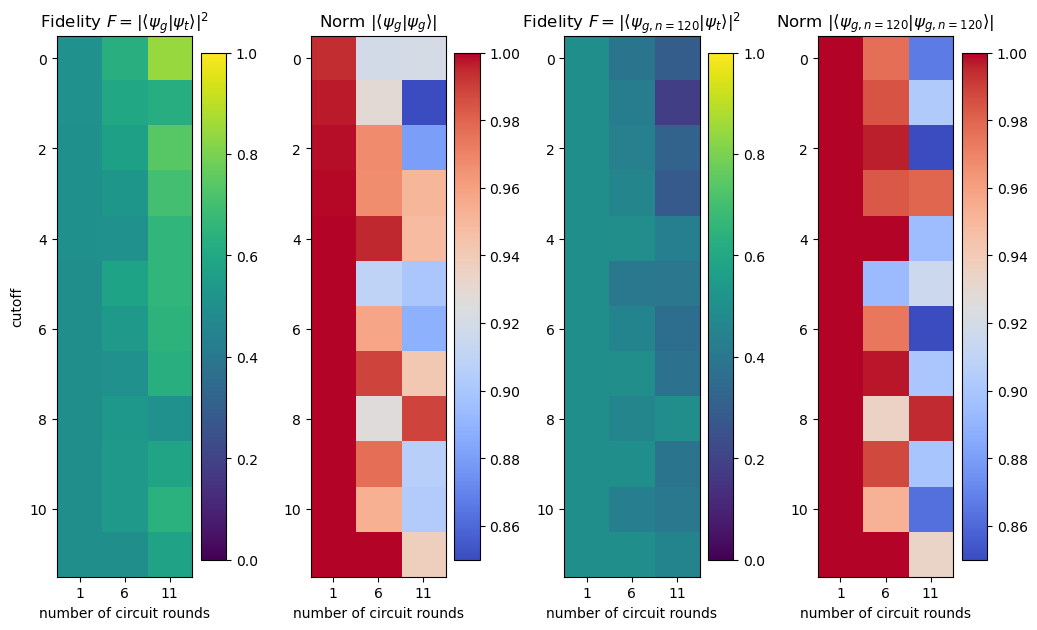

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 18))

# First subplot
im1= ax1.imshow(bestFids, cmap='viridis', vmin=0., vmax=1.)
ax1.set_title(r'Fidelity $F = |\langle \psi_g| \psi_t\rangle|^2$')
ax1.set_xlabel('number of circuit rounds')
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(num_blocks)
ax1.set_ylabel('cutoff')
fig.colorbar(im1, ax=ax1)

# Second subplot
im2 = ax2.imshow(norm, cmap='coolwarm', vmin=0.85, vmax=1.)
ax2.set_title(r'Norm $|\langle \psi_{g}| \psi_{g}\rangle|$')
ax2.set_xlabel('number of circuit rounds')
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(num_blocks)
fig.colorbar(im2, ax=ax2)

# Third subplot
im3 = ax3.imshow(bestFids_high_cutoff, cmap='viridis', vmin=0., vmax=1.)
ax3.set_title(r'Fidelity $F = |\langle \psi_{g, n=120}| \psi_t\rangle|^2$')
ax3.set_xlabel('number of circuit rounds')
ax3.set_xticks([0, 1, 2])
ax3.set_xticklabels(num_blocks)
fig.colorbar(im3, ax=ax3)

# Fourth subplot
im4 = ax4.imshow(norm_high_cutoff, cmap='coolwarm', vmin=0.85, vmax=1.)
ax4.set_title(r'Norm $|\langle \psi_{g, n=120}| \psi_{g, n=120} \rangle|$')
ax4.set_xlabel('number of circuit rounds')
ax4.set_xticks([0, 1, 2])
ax4.set_xticklabels(num_blocks)
fig.colorbar(im4, ax=ax4)

# plt.tight_layout() 
plt.subplots_adjust(wspace=.5)
plt.show()

## Conclusion

- strategy to train circuits with low cutoff and high number of parameters and then reconstruct state with high cutoff seems not to work
- interpretation by Francesco: trained curcuit for low cutoff is not physical

## Brute force: with medium cutoff just increas the number of parameters

Ansatz: just increase the number of parameters with cost of (really) high computation time

XRVtanhS
1. X: Displacement operator
2. R: Rotation gate
3. Vtanh: regularised Cubic phase gate: $V_{\tanh}(s) = \exp\left( -i\tanh(s)\hat{q}^3 \right)$
4. S: Squeezing gate

In [55]:
# hyperparameter
cutoff = 30
delta = 0.25
num_blocks = [6, 10, 12, 14, 15, 16, 18, 20, 22, 24, 26, 28, 30] 
state = [0,0]
circuit = 'XRVtanhS' 

# read in data
opt = []
length = []
bestFids = []
bestNorm = []

for i in range(len(num_blocks)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuit}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt = optimization.Optimization(file_name=file_name)
    bestFids.append(opt.get_bestFid())
    bestNorm.append(opt.norm_best_state())
    length.append(auxiliary.count_gates(circuit)*num_blocks[i])

# add results
results = pd.DataFrame()
results['circuit'] = np.repeat(circuit, len(num_blocks))
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = length 
results[r'$n_{\text{cutoff}}$'] = [cutoff for i in range(len(num_blocks))]

# round results
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'].round(3)
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'].round(3)

# show results
results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,$n_{\text{cutoff}}$
0,XRVtanhS,0.794,0.633,24,30
1,XRVtanhS,0.922,0.756,40,30
2,XRVtanhS,0.889,0.815,48,30
3,XRVtanhS,0.926,0.872,56,30
4,XRVtanhS,0.942,0.878,60,30
5,XRVtanhS,0.939,0.882,64,30
6,XRVtanhS,0.957,0.921,72,30
7,XRVtanhS,0.967,0.927,80,30
8,XRVtanhS,0.973,0.948,88,30
9,XRVtanhS,0.963,0.935,96,30


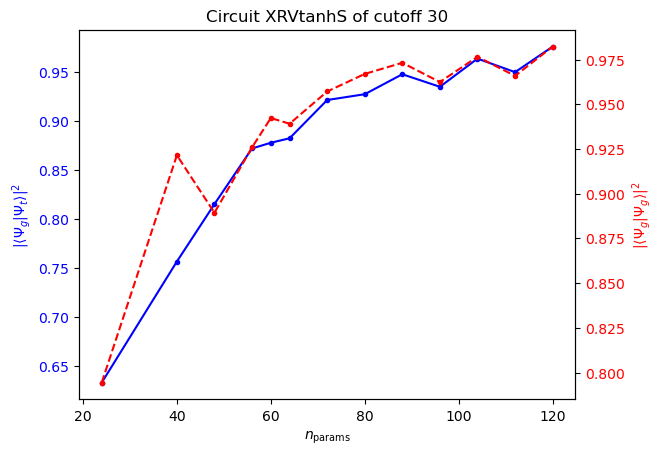

In [56]:
# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot on first axis
ax1.plot(length, bestFids, 'b-', marker='.', label=r'$|\langle\Psi_g|\Psi_t\rangle|^2$')
ax1.set_xlabel(r'$n_{\text{params}}$')
ax1.set_ylabel(r'$|\langle\Psi_g|\Psi_t\rangle|^2$', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create second axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(length, bestNorm, 'r--', marker='.', label=r'$|\langle\Psi_g|\Psi_g\rangle|^2$')
ax2.set_ylabel(r'$|\langle\Psi_g|\Psi_g\rangle|^2$', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title(f'Circuit {circuit} of cutoff {cutoff}')
plt.show()

### Conclusion 

- normalization follows peroformance 
- with brute force its possible to reach higher fidelities and higher normalisation but arbitrary high fidelities as for the Kerr gate are still barely possible because of heavy computational overhead
- problem with increasing the cutoff remains and with that the question whether the results are even physical 

### Q.E.D.: Increasing the cutoff later does not work

In [67]:
# hyperparameter
cutoff = 30
cutoff_high = [30, 60, 90, 120]
delta = 0.25
num_blocks = 30
state = [0,0]
circuit = 'XRVtanhS' 

# read in data
file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuit}_{cutoff}_{str(delta).replace('.', '')}_{num_blocks}"
opt = optimization.Optimization(file_name=file_name)
params = opt.get_bestSol()
gates = opt.get_gates()

fids = []
norms = []
length = []

for n_cutoff in cutoff_high:
    ket_high_cutoff = auxiliary.prepare_state(gates=np.flip(gates), params=-np.flip(opt.get_bestSol()), cutoff=n_cutoff).ket()
    ket_target_high_cutoff = auxiliary.prepare_GKP(epsilon=delta**2, cutoff=n_cutoff, state=state).ket()
    
    fids.append(np.abs(np.dot(ket_target_high_cutoff.conj(), ket_high_cutoff))**2)
    norms.append(np.abs(np.dot(ket_high_cutoff.conj(), ket_high_cutoff)))
    length.append(auxiliary.count_gates(circuit)*num_blocks)

# add results
results = pd.DataFrame()
results['circuit'] = np.repeat(circuit, len(cutoff_high))
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = norms
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = fids
results[r'$n_{\text{params}}$'] = length 
results[r'$n_{\text{cutoff}}$'] = [cutoff for i in range(len(cutoff_high))]
results[r'$n_{\text{cutoff high}}$'] = cutoff_high

# round results
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'].round(3)
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'].round(3)

# show results
results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,$n_{\text{cutoff}}$,$n_{\text{cutoff high}}$
0,XRVtanhS,0.982,0.976,120,30,30
1,XRVtanhS,0.941,0.238,120,30,60
2,XRVtanhS,0.956,0.042,120,30,90
3,XRVtanhS,0.958,0.113,120,30,120


### Conclusion 

- low cutoff training, high cutoff training does not work
- fidelity for increased cutoff of $n_{\text{cutoff high}}$ compares to completely random parameters  of the circuit

## Constant parameter 

Ansatz (by Francesco): chose the parameter of the non-gaussian gate as constant and optimise over the resting parameters

XRVconstS
1. X: Displacement operator
2. R: Rotation gate
3. constant Cubic phase gate: $V_{\tanh}(s) = \exp\left( -i\,\text{sign}(s)\hat{q}^3 \right)$
4. S: Squeezing gate

In [62]:
# hyperparameter
cutoff = [60, 60, 30, 60, 90]
delta = 0.25
num_blocks = [25, 25, 35, 40, 45]
state = [0,0]
circuits = ['XRKS', 'XRVtanhS', 'XRVconstS', 'XRVconstS', 'XRVconstS'] 

# read in data
opt = []
length = []
bestFids = []
bestNorm = []
correction = [0, 0, 1, 1, 1]

for i in range(len(num_blocks)): 
    file_name = f"data_{auxiliary.state_dict[tuple(state)]}_{circuits[i]}_{cutoff[i]}_{str(delta).replace('.', '')}_{num_blocks[i]}"
    opt = optimization.Optimization(file_name=file_name)
    bestFids.append(opt.get_bestFid())
    bestNorm.append(opt.norm_best_state())
    length.append((auxiliary.count_gates(circuits[i])-correction[i])*num_blocks[i])

# add results
results = pd.DataFrame()
results['circuit'] = circuits
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = bestNorm
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = bestFids
results[r'$n_{\text{params}}$'] = length 
results[r'$n_{\text{cutoff}}$'] = cutoff

# round results
results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_g\rangle|^2$'].round(3)
results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'] = results[r'$|\langle\Psi_g|\Psi_t\rangle|^2$'].round(3)

# show results
results

,circuit,$|\langle\Psi_g|\Psi_g\rangle|^2$,$|\langle\Psi_g|\Psi_t\rangle|^2$,$n_{\text{params}}$,$n_{\text{cutoff}}$
0,XRKS,0.992,0.983,100,60
1,XRVtanhS,0.975,0.908,100,60
2,XRVconstS,0.990,0.989,105,30
3,XRVconstS,0.935,0.880,120,60
4,XRVconstS,0.915,0.830,135,90


### Conclusion

- performance surprisingly good and high fidelities possible
- still, arbitrary high fidelities not reachable
- for higher cutoffs, again, bad performance and insufficient fidelities

# Conclusion and Open Question

The circuit with the Kerr gate as non-gaussian gate remains the gold standard, and fidelities as arbitrary high as for the Kerr hasn't been reached in our simulations. Several strategies and circuits variations have been tested, some with more success some with less. Overall, one can conclude that, even though some strategies and circuit variations look promising, these simulation strategies and circuit variations did not outperform the classical circuit out of the four gates displacement, rotation, phase gate, and squeezing applied as block several rounds. More fundamental than all these open questions of simulations remain the question about the fact that after increasing the cutoff for a circuit and its parameters trained with lower cutoff the fidelities decreases significantly. It poses the question whether our simulation results are physical at all, and at what high cutoff do we then consider a parameters set as physical.